In [70]:
import pandas as pd

data = pd.read_csv('../data/processed/import_declarations_intermax_daily.csv')

data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Abgabe
0,2017-01-02,439.79
1,2017-01-03,2107.94
2,2017-01-04,215.37
3,2017-01-05,0.00
4,2017-01-06,0.00
...,...,...
1040,2019-11-08,1265.71
1041,2019-11-09,0.00
1042,2019-11-10,0.00
1043,2019-11-11,0.00


In [71]:
data['Abgabe_rolling'] = data['Abgabe'].rolling(window=30).mean()

data.Abgabe_rolling.dropna()

29       414.082333
30       399.422667
31       329.158000
32       321.979000
33       321.979000
           ...     
1040    1592.881333
1041    1561.454000
1042    1429.151333
1043    1429.151333
1044    1441.451333
Name: Abgabe_rolling, Length: 1016, dtype: float64

In [72]:
from statsmodels.tsa.tsatools import add_lag

num_lags = 2

lagged_features = pd.DataFrame()

for i in range(1, num_lags + 1):
    lagged_features[f'Abgabe_lag_{i}'] = data.Abgabe_rolling.shift(i)


df_with_lags = pd.concat([data, lagged_features], axis=1)
df_with_lags = df_with_lags.dropna(subset='Abgabe_rolling')
df_with_lags

,Date,Abgabe,Abgabe_rolling,Abgabe_lag_1,Abgabe_lag_2
29,2017-01-31,1045.81,414.082333,NaN,NaN
30,2017-02-01,0.00,399.422667,414.082333,NaN
31,2017-02-02,0.00,329.158000,399.422667,414.082333
32,2017-02-03,0.00,321.979000,329.158000,399.422667
33,2017-02-04,0.00,321.979000,321.979000,329.158000
...,...,...,...,...,...
1040,2019-11-08,1265.71,1592.881333,1616.085000,1609.229000
1041,2019-11-09,0.00,1561.454000,1592.881333,1616.085000
1042,2019-11-10,0.00,1429.151333,1561.454000,1592.881333
1043,2019-11-11,0.00,1429.151333,1429.151333,1561.454000


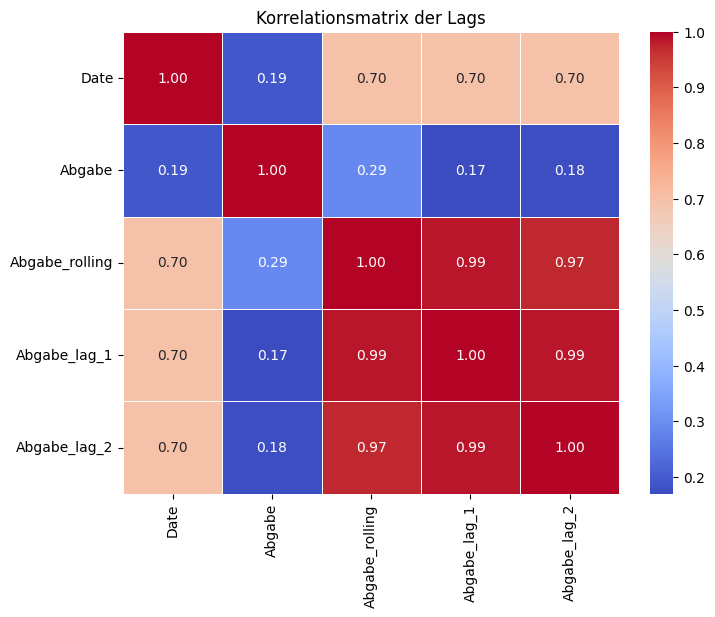

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_with_lags.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix der Lags')
plt.show()

In [74]:
from data_preperation import split_data

train, test = split_data(data=df_with_lags, test_split=0.66)

train = train.dropna()

train: 670 , test: 346


In [75]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day

/tmp/ipykernel_319021/1913794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year'] = test['Date'].dt.year
/tmp/ipykernel_319021/1913794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Month'] = test['Date'].dt.month
/tmp/ipykernel_319021/1913794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [77]:
X = train[['Year', 'Month', 'Day', 'Abgabe_lag_1', 'Abgabe_lag_2']]
y = train['Abgabe_rolling']

print(X.info(), y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 31 to 698
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          668 non-null    int32  
 1   Month         668 non-null    int32  
 2   Day           668 non-null    int32  
 3   Abgabe_lag_1  668 non-null    float64
 4   Abgabe_lag_2  668 non-null    float64
dtypes: float64(2), int32(3)
memory usage: 23.5 KB
<class 'pandas.core.series.Series'>
Index: 668 entries, 31 to 698
Series name: Abgabe_rolling
Non-Null Count  Dtype  
--------------  -----  
668 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB
None None


In [78]:
train

,Date,Abgabe,Abgabe_rolling,Abgabe_lag_1,Abgabe_lag_2,Year,Month,Day
31,2017-02-02,0.00,329.158000,399.422667,414.082333,2017,2,2
32,2017-02-03,0.00,321.979000,329.158000,399.422667,2017,2,3
33,2017-02-04,0.00,321.979000,321.979000,329.158000,2017,2,4
34,2017-02-05,0.00,321.979000,321.979000,321.979000,2017,2,5
35,2017-02-06,1160.57,360.664667,321.979000,321.979000,2017,2,6
...,...,...,...,...,...,...,...,...
694,2018-11-27,0.00,914.731667,914.731667,884.508000,2018,11,27
695,2018-11-28,475.37,741.030000,914.731667,914.731667,2018,11,28
696,2018-11-29,447.98,729.940667,741.030000,914.731667,2018,11,29
697,2018-11-30,0.00,729.940667,729.940667,741.030000,2018,11,30


In [79]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=120)
model.fit(X, y)

RandomForestRegressor(random_state=120)

In [80]:
median_values = test[['Abgabe_lag_1', 'Abgabe_lag_2']].median()

# Fill missing values in lag columns with respective medians
test[['Abgabe_lag_1', 'Abgabe_lag_2']] = test[['Abgabe_lag_1', 'Abgabe_lag_2']].fillna(median_values)

/tmp/ipykernel_319021/480140656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['Abgabe_lag_1', 'Abgabe_lag_2']] = test[['Abgabe_lag_1', 'Abgabe_lag_2']].fillna(median_values)


In [82]:
y_pred = pd.Series(model.predict(test[['Year', 'Month', 'Day', 'Abgabe_lag_1', 'Abgabe_lag_2']]), index=test['Date'])

y_pred

Date
2018-12-02     721.524410
2018-12-03     871.554140
2018-12-04     836.835900
2018-12-05     786.103917
2018-12-06     785.766657
                 ...     
2019-11-08    1607.865887
2019-11-09    1620.246030
2019-11-10    1378.430610
2019-11-11    1482.221970
2019-11-12    1482.706030
Length: 346, dtype: float64

In [83]:
from data_preperation import get_validation_matrix

y_pred_validation = y_pred.reset_index(drop=True)
test_validation = test.Abgabe_rolling.reset_index(drop=True)

validation_results = get_validation_matrix(y_pred, test['Abgabe_rolling'], train.Abgabe_rolling)
validation_results['name'] = 'RandomForrests'
validation_results

{'MAE': 131.11644402697496,
 'MSE': 37251.288407138614,
 'meanMASE': 3.2632728512427125,
 'r2': 0.8946613026357939,
 'Forecast Bias': nan,
 'Forecast Accuracy (%)': 30.64408174202112,
 'name': 'RandomForrests'}

In [84]:
from data_preperation import save_metrics_to_csv

save_metrics_to_csv(validation_results)

Metrics saved to metrics.csv


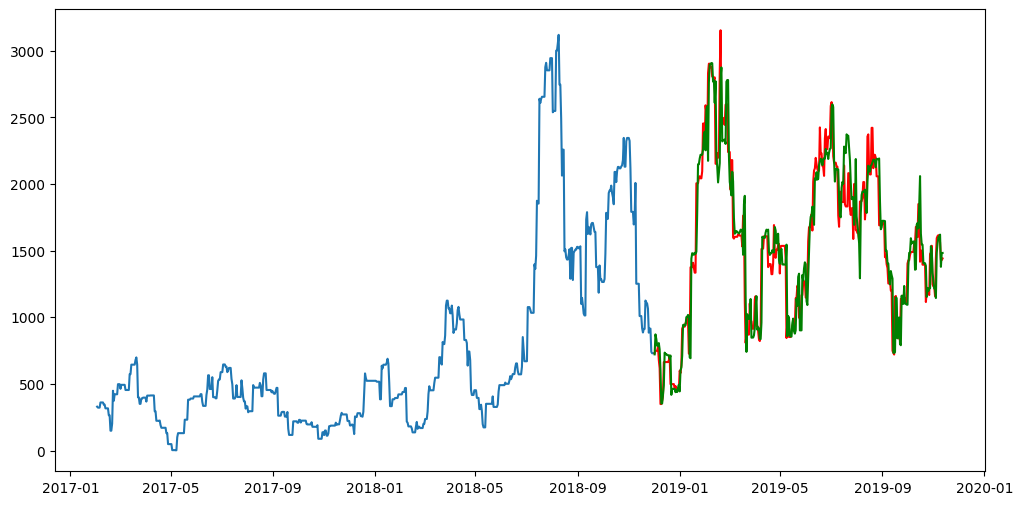

In [85]:
test_indexed = test.set_index('Date')

plt.figure(figsize=(12, 6))
plt.plot(train.Date, train.Abgabe_rolling)
plt.plot(test_indexed.index, test_indexed['Abgabe_rolling'], label='Actual', color='red')
plt.plot(test_indexed.index, y_pred, color="green")

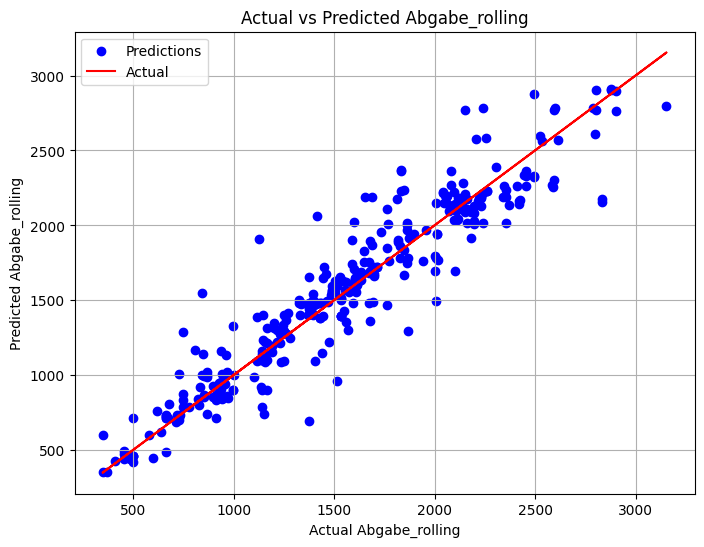

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(test['Abgabe_rolling'], y_pred, color='blue', label='Predictions')
plt.plot(test['Abgabe_rolling'], test['Abgabe_rolling'], color='red', label='Actual')  # Plotting the identity line
plt.title('Actual vs Predicted Abgabe_rolling')
plt.xlabel('Actual Abgabe_rolling')
plt.ylabel('Predicted Abgabe_rolling')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
import pickle

with open('../src/models/randomforest_model.pkl', 'wb') as f:
    pickle.dump(model, f)
